## Import Data

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# print current working directory
print(os.getcwd())

C:\Users\i9400230\Python_ZT\2020_DataPilot


In [3]:
# Change working directory
os.chdir('C:\\Users\\i9400230\\Python_ZT\\2020 數據創意提案大賽\\Data') 
print(os.getcwd())

C:\Users\User\Desktop\2020 數據創意提案大賽\Data


In [3]:
#Import data
Full_PChome = pd.read_excel('2020datapilot_PChome.xlsx')
# Rename columns
Full_PChome = Full_PChome.rename(columns={"消費者編號(member_id) " : "member_id", "郵遞區號(postal_cd)" : "postal_cd",\
                                        "訂單日期(date_cd)" : "date_cd","商品編號(prod_id)" : "prod_id",\
                                        "商品名稱(goods)" : "goods","商品類別(department)" : "department",\
                                        "商品專區(index)" : "index","商品數量(prod_Q)" : "prod_Q",\
                                        "商品單價(price)" : "price","建議售價(MSRP)" : "MSRP"})
Full_PChome.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490,NaN
1,4663689,600,day1,QFAXAS-A900A38S1-001,【HappyLife】桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599,NaN
2,8097088,815,day1,QFAAJY-A9009W99R-000,【dayneeds】輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927,1359.0
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690,990.0
4,15438512,704,day1,CGAACT-A80423382-005,車用攝影鏡頭,運動戶外,汽百/記錄器,1,1055,1600.0


In [6]:
# Full_PChome info
Full_PChome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   member_id   60000 non-null  int64  
 1   postal_cd   60000 non-null  int64  
 2   date_cd     60000 non-null  object 
 3   prod_id     60000 non-null  object 
 4   goods       59998 non-null  object 
 5   department  60000 non-null  object 
 6   index       60000 non-null  object 
 7   prod_Q      60000 non-null  int64  
 8   price       60000 non-null  int64  
 9   MSRP        46436 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 4.6+ MB


In [15]:
# Full_PChome continuous variable describe
pd.set_option('float_format', '{:.1f}'.format)
Full_PChome.iloc[:,-3:].describe()

,prod_Q,price,MSRP
count,60000.0,60000.0,46436.0
mean,1.2,3507.7,4636.5
std,1.1,17366.7,10952.0
min,1.0,0.0,1.0
25%,1.0,490.0,750.0
50%,1.0,990.0,1599.0
75%,1.0,2699.0,3699.0
max,20.0,2580000.0,281000.0


## Day analysis

In [12]:
# date_cd unique
print(Full_PChome['date_cd'].unique(),'\nUnique count of day:',Full_PChome['date_cd'].nunique())

['day1' 'day2' 'day3' 'day4' 'day5' 'day6' 'day7' 'day8' 'day9' 'day10'
 'day11' 'day12' 'day13' 'day14' 'day15' 'day16' 'day17' 'day18' 'day19'
 'day20' 'day21' 'day22' 'day23' 'day24' 'day25' 'day26' 'day27' 'day28'
 'day29' 'day30' 'day31' 'day32' 'day33' 'day34' 'day35' 'day36' 'day37'
 'day38' 'day39' 'day40' 'day41' 'day42' 'day43' 'day44' 'day45' 'day46'
 'day47' 'day48' 'day49' 'day50' 'day51' 'day52' 'day53' 'day54' 'day55'
 'day56' 'day57' 'day58' 'day59' 'day60' 'day61' 'day62' 'day63' 'day64'
 'day65' 'day66' 'day67' 'day68' 'day69' 'day70' 'day71' 'day72' 'day73'
 'day74' 'day75' 'day76' 'day77' 'day78' 'day79' 'day80' 'day81' 'day82'
 'day83' 'day84' 'day85' 'day86' 'day87' 'day88' 'day89' 'day90' 'day91'
 'day92'] 
Unique count of Ticker: 92


In [44]:
# date_cd Frequency table describe
pd.value_counts(Full_PChome['date_cd']).to_frame().reset_index().describe()

,date_cd
count,92.0
mean,652.2
std,284.2
min,416.0
25%,525.5
50%,603.5
75%,693.2
max,2526.0


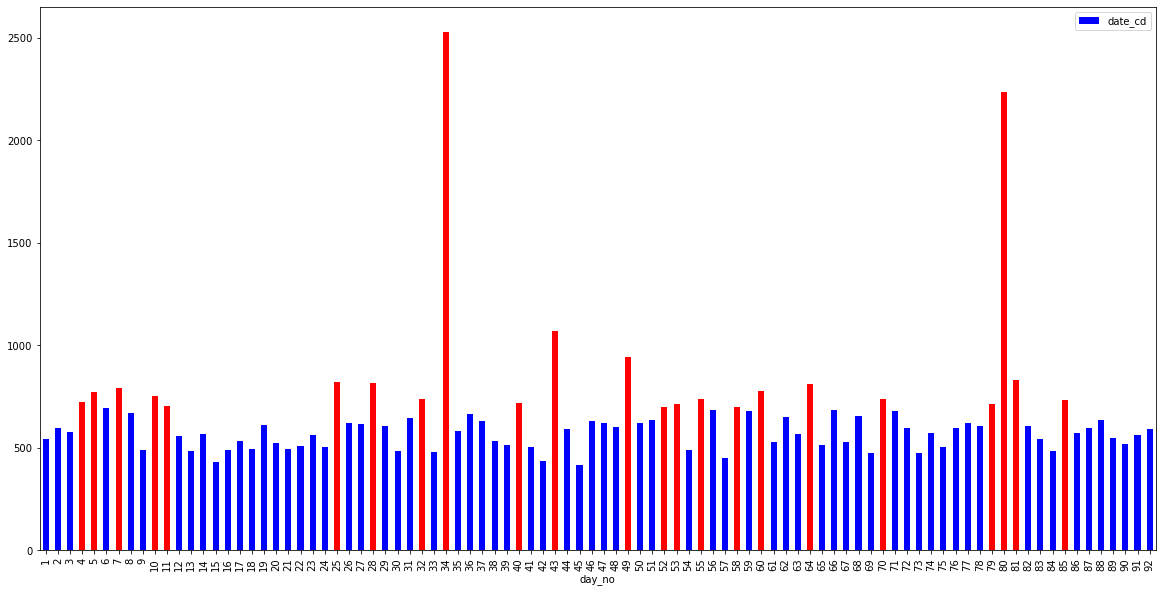

In [4]:
# date_cd Frequency table plot
date_cd_f = pd.value_counts(Full_PChome['date_cd']).to_frame().reset_index()
date_cd_f['day_no'] = date_cd_f['index'].str.split('y', expand = True)[1].astype('int')
date_cd_f = date_cd_f.drop(['index'], axis = 1)
date_cd_f = date_cd_f.sort_values(by = 'day_no').set_index('day_no')
date_cd_f.plot(kind = 'bar',color = [np.where(date_cd_f["date_cd"]>693, 'r', 'b')],figsize = (20,10))

## Goods Analysis

In [7]:
# Fix view Chinese problem 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定預設字型:解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False           # 解決儲存影象是負號'-'顯示為方塊的問題

In [28]:
# Trim Whitespace in cols
Full_PChome['department'] = Full_PChome['department'].str.strip()
Full_PChome['index'] = Full_PChome['index'].str.strip()
Full_PChome['goods'] = Full_PChome['goods'].str.strip()

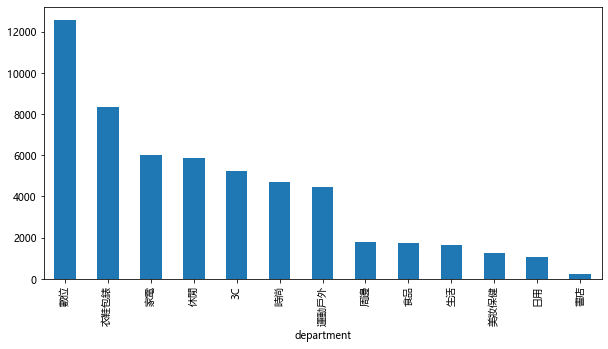

In [29]:
# Create Price*Quantity
Full_PChome['P_Q'] = Full_PChome['prod_Q'] * Full_PChome['price']

# Group by department
df_gp = Full_PChome.groupby('department').mean()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=False).plot(kind = 'bar',figsize = (10,5))

In [30]:
# Group by department, index
df_gp = Full_PChome.groupby(['department', 'index']).mean()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=False).to_frame().head(20)

,,P_Q
department,index,
運動戶外,Johnson,228000.00
休閒,機百/安全帽,48080.50
時尚,瑞士錶,31729.96
家電,電子鍋/電鍋,27223.00
3C,筆記電腦,26837.41
運動戶外,機車/部品,26531.33
家電,HITACHI,25739.16
衣鞋包錶,行 李 箱,25200.00
家電,音響劇院,23170.48


In [31]:
# Group by department, index, goods
df_gp = Full_PChome.groupby(['department', 'index', 'goods']).mean()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=False).to_frame().head(20)

P_Q
department index   goods                                                        
家電         音響劇院    Audio Valve Challenger 400 單聲道後級擴大機                 2580000.0
時尚         瑞士錶     ROLEX 勞力士 海使116610LV  專業潛水錶綠水鬼                       573000.0
                   ROLEX 勞力士126300 Datejust 蠔式恆動易調鏈帶腕錶藍面-41mm           284000.0
                   CHANEL 香奈兒 2019新款透背款H5705 38mm 時尚女王鑽面款 Automati...   232000.0
運動戶外       Johnson FUJIIRYOKI 富士醫療器JP-1100按摩椅-米色                        228000.0
時尚         黃金      Jove gold 幸運守護神黃金條塊-15公克三塊(共45公克)                    199998.0
           瑞士錶     ROLEX 勞力士 116000 熱門藍面3.6.9 36mm 五年保固                 194600.0
           黃金      Jove Gold 漾金飾 富貴福人黃金男項鍊(約20.20錢)(約2尺/60cm)           186780.0
                   Jove gold 幸運守護神黃金條塊-伍台錢三塊(共15台錢)                     170832.0
3C         數位相機    Canon EOS 1DX MarkII 單機身 *(中文平輸)                     156900.0
時尚         瑞士錶     Longines 浪琴 Evidenza 典藏系列金馬彩繪限量機械錶 L27068902         153425.0
           黃金      煌隆 壹台兩黃金條塊                                           149998.0
                   Taiwan Precious Metals黃金條塊 - 壹台兩                     149998.0
運動戶外       機車/部品   YAMAHA R15 雙碟 155- 全新進口車                             149800.0
時尚         瑞士錶     PANERAI 沛納海LUMINOR BASE LOGO PAM00773                145000.0
運動戶外       機車/部品   HONDA CBR150R-全新進口車                                  145000.0
                   SUZUKI GSX R150 跑車版                                  129999.0
時尚         黃金      Jove gold 圓滿黃金項鍊(約15.30錢)(約2尺60cm)                   129800.0
運動戶外       機車/部品   HONDA MSX 125 SF ABS全新進口車 (平行輸入原裝進口)                 123600.0
                   YAMAHA MT-15 - 全新進口車                                 123000.0